In [1]:
# Step 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Step 3: Load dataset
# Update the path below to point to your dataset folder in Google Drive
data_dir = "/content/drive/MyDrive/Final_MachineLearning_Lab/Dataset" # Update this path if necessary
categories = os.listdir(data_dir)

In [4]:
# Step 4: Preprocess data
image_size = (64, 64)  # Resize images to 64x64
X = []  # Features
y = []  # Labels

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for image_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, image_name)
            image = load_img(img_path, target_size=image_size)
            image = img_to_array(image) / 255.0  # Normalize the image
            X.append(image)
            y.append(category)
        except Exception as e:
            print(f"Error loading image {image_name}: {e}")

X = np.array(X)
y = np.array(y)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
# Step 5: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [6]:
# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [7]:
# Step 7: Build a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 8: Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Step 9: Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.2194 - loss: 1.5950 - val_accuracy: 0.2031 - val_loss: 1.4288
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.3107 - loss: 1.3764 - val_accuracy: 0.3438 - val_loss: 1.3814
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.4298 - loss: 1.3218 - val_accuracy: 0.2344 - val_loss: 1.3782
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4506 - loss: 1.2266 - val_accuracy: 0.3750 - val_loss: 1.3121
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5988 - loss: 1.0315 - val_accuracy: 0.4688 - val_loss: 1.2680
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.6515 - loss: 0.9232 - val_accuracy: 0.4375 - val_loss: 1.1948
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.6923 - loss: 0.7772 - val_accuracy: 0.4375 - val_loss: 1.2240
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.7302 - loss: 0.6876 - val_accuracy: 0.4219 - val_loss:

In [10]:
# Step 10: Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5914 - loss: 0.9579
CNN Model Accuracy: 61.25%


In [12]:
# Step 11: Train a conventional SVM model
X_flat = X.reshape(len(X), -1)  # Flatten images for SVM
X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train_flat)

SVC(kernel='linear')

In [13]:
# Step 12: Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_flat)
print(f"SVM Model Accuracy: {accuracy_score(y_test_flat, svm_predictions) * 100:.2f}%")
print(classification_report(y_test_flat, svm_predictions, target_names=label_encoder.classes_))


SVM Model Accuracy: 41.25%
              precision    recall  f1-score   support

         Bus       0.35      0.33      0.34        18
         Car       0.35      0.50      0.41        18
       Truck       0.44      0.31      0.36        26
  motorcycle       0.53      0.56      0.54        18

    accuracy                           0.41        80
   macro avg       0.42      0.42      0.41        80
weighted avg       0.42      0.41      0.41        80



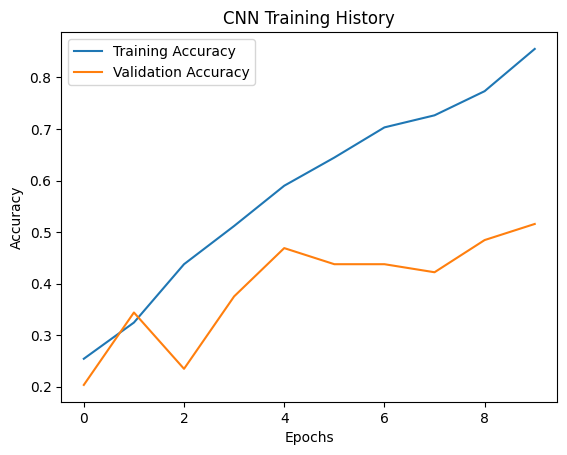

In [14]:
# Step 13: Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


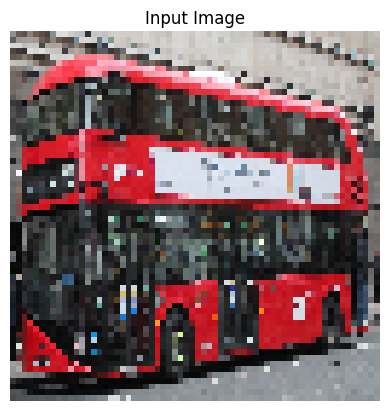

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: Bus


In [41]:
# Step 14: Classify and display an image from the dataset
def classify_and_display_image(image_path):
    # Load and display the image
    image = load_img(image_path, target_size=image_size)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    # Preprocess the image for prediction
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make prediction using the CNN model
    prediction = cnn_model.predict(image_array)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    # Print the predicted class
    print(f"Predicted Class: {predicted_class}")

    # Increase image resolution for better clarity
    from PIL import Image
    image = Image.open(image_path)
    image = image.resize((256, 256))  # Increase size if necessary

    # Return the resized image
    return image

# Example usage
image = classify_and_display_image('/content/drive/MyDrive/Final_MachineLearning_Lab/Dataset/Bus/Image_13.jpg')

# Now, 'image' variable holds the output image, you can further process or display it.
# Example: To display the output image again:
# plt.imshow(image)
# plt.show()